<a href="https://colab.research.google.com/github/RLandryD/DataSCience/blob/main/watermarking_with_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

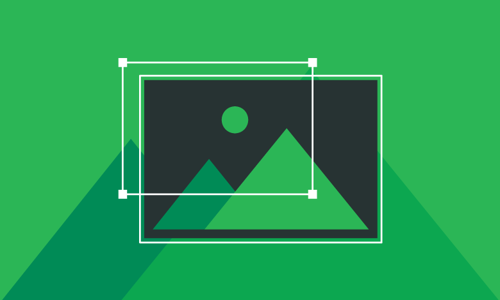

In [ ]:
from requests.models import stream_decode_response_unicode
#Rading the image from an URL
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

(3840, 2160)


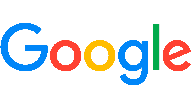

In [ ]:
# Reading the logo from the URL
logo = Image.open(requests.get('https://1000marcas.net/wp-content/uploads/2020/02/logo-Google.png', stream=True).raw)
logo_logow = logo.resize((192, 108))
logo_textw = logo.resize((192, 108))
print(logo.size)
logo_logow

In [ ]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo_logow = np.array(logo_logow.convert('RGB'))
h_logo, w_logo, _ = logo_logow.shape

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# Get the center of the original image. It's the location where we will place the watermark

center_y = int(h_image /2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo/2)
left_x = center_x - int(w_logo/2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo
print(center_x)
print(w_logo)
print(right_x)
print(left_x)
print(image_logow.shape)

250
192
346
154
(300, 500, 3)


In [ ]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the logo to the ROI
result = cv2.addWeighted(roi, 1, logo_logow, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

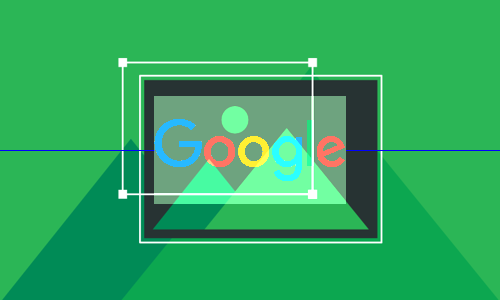

In [ ]:
# Plotting the logo watermark into the image
img = Image.fromarray(image_logow, 'RGB')
img

In [ ]:
# Text watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Google', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX,
            fontScale=0.5, color=(0, 0, 255), thickness = 2, lineType = cv2.LINE_4);

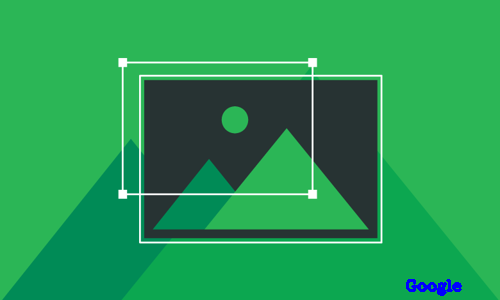

In [ ]:
imgtxt = Image.fromarray(image_text, 'RGB')
imgtxt